In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
data = pd.read_csv('Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
x_train = data.iloc[:,[1,2,3,4,5]].values

In [4]:
for i in range(len(x_train)):
    x_train[i][3] = float(x_train[i][3].replace(',',''))
    x_train[i][4] = float(x_train[i][4].replace(',',''))

In [5]:
x_train

array([[325.25, 332.83, 324.97, 663.59, 7380500.0],
       [331.27, 333.87, 329.08, 666.45, 5749400.0],
       [329.83, 330.75, 326.89, 657.21, 6590300.0],
       ...,
       [793.7, 794.23, 783.2, 785.05, 1153800.0],
       [783.33, 785.93, 778.92, 782.79, 744300.0],
       [782.75, 782.78, 770.41, 771.82, 1770000.0]], dtype=object)

In [6]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

/home/varun/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X_train = []
Y_train = []
for i in range(80,len(x_train)):
    X_train.append(x_train[i-80:i])
    Y_train.append(x_train[i][0])
Y_train = np.array(Y_train)
X_train = np.array(X_train)

In [8]:
model = Sequential()

model.add(LSTM(units = 200, return_sequences = True, input_shape = (80, 5))) #timestep and features
model.add(Dropout(0.2))


model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))


model.add(LSTM(units = 25))
model.add(Dropout(0.2))


model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 80, 200)           164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 200)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80, 100)           120400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80, 50)            30200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
__________

1178/1178 [==============================] - 11s 10ms/step - loss: 0.0137
Epoch 79/100
1178/1178 [==============================] - 11s 9ms/step - loss: 0.0143
Epoch 80/100
1178/1178 [==============================] - 11s 9ms/step - loss: 0.0128
Epoch 81/100
1178/1178 [==============================] - 10s 9ms/step - loss: 0.0133
Epoch 82/100
1178/1178 [==============================] - 11s 10ms/step - loss: 0.0146
Epoch 83/100
1178/1178 [==============================] - 13s 11ms/step - loss: 0.0151
Epoch 84/100
1178/1178 [==============================] - 12s 10ms/step - loss: 0.0144
Epoch 85/100
1178/1178 [==============================] - 12s 10ms/step - loss: 0.0136
Epoch 86/100
1178/1178 [==============================] - 12s 10ms/step - loss: 0.0139
Epoch 87/100
1178/1178 [==============================] - 10s 9ms/step - loss: 0.0149
Epoch 88/100
1178/1178 [==============================] - 11s 9ms/step - loss: 0.0131
Epoch 89/100
1178/1178 [==============================] - 11s

In [9]:
model.save('my_model_5_features.h5')

In [17]:
from keras.models import load_model
model = load_model('my_model_5_features.h5')

In [18]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
test_data = test_data.iloc[:,[1,2,3,4,5]].values

for i in range(len(test_data)):
    test_data[i][4] = float(test_data[i][4].replace(',',''))

train_data = pd.read_csv('Google_Stock_Price_Train.csv')
train_data = train_data.iloc[:,[1,2,3,4,5]].values

for i in range(len(train_data)):
    train_data[i][3] = float(train_data[i][3].replace(',',''))
    train_data[i][4] = float(train_data[i][4].replace(',',''))

In [19]:
total_dataset = np.concatenate((train_data,test_data), axis = 0)

In [20]:
test_sample = total_dataset[len(total_dataset) - len(test_data) - 80:]

In [21]:
test_sample = scaler.transform(test_sample)

/home/varun/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
X_test = []
for i in range(80, 100):
    X_test.append(test_sample[i-80:i])
X_test = np.array(X_test)

In [23]:
predicted_stock_price = model.predict(X_test)
actual_stock_price = test_sample[80:]

In [24]:
actual_price_scaled = []
for i in actual_stock_price:
    actual_price_scaled.append(i[0])

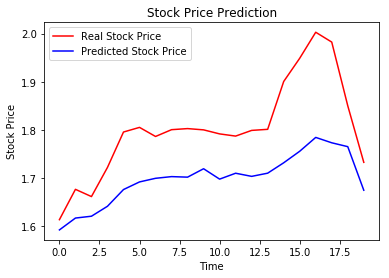

In [28]:
plt.plot(actual_price_scaled, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()